#### ```Importing Necessary Libraries```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

#### ```Loading the dataset and splitting into Train and Test sets```<br> 
##### We have used MetaboAnalyst to find the best features for the dataset using VIP Score > threshold. The dataset is then split into Train and Test sets.

In [2]:
# import the 1st sheet from the excel file 3groups-OSCC_PM_Normal.xlsx named as postive
positive = pd.read_excel(
    '../dataset/3groups-OSCC_PM_Normal.xlsx', sheet_name='Positive')
# make the fist row as the column header
positive.columns = positive.iloc[0]
positive = positive[1:]
print(positive.shape)
positive.head()

(3771, 43)


,Class,OSCC,PM,OSCC,Normal,OSCC,OSCC,OSCC,OSCC,PM,...,OSCC,PM,OSCC,Normal,OSCC,PM,OSCC,Normal,Normal,PM
1,MB_1,13902280.80312,26286783.625224,6672646.465963,23408169.61702,27266880.418474,2390663.941361,22906877.003764,14673118.286776,28513248.963192,...,40564711.115861,26008457.854401,84000220.583306,29248776.63919,3745692.600328,46502098.615452,31635693.455675,9956775.640641,16343980.16464,23345054.219212
2,MB_2,14764090.903595,4062261.362037,39795085.770143,4384209.277807,8915997.043057,26393287.236541,9661650.365291,15009511.310014,17928321.274401,...,25467076.521363,9042689.769267,16747297.940765,10007628.708213,25966247.559659,28870874.751509,17241584.131337,16424904.16346,15990018.304811,24413775.509215
3,MB_3,13764747.384423,9848135.387541,14041084.659293,9076586.207895,11924399.325893,14692322.017713,10937987.128226,11145946.897865,7525072.337547,...,8970173.083869,4886748.755182,8838043.206064,10414297.67267,11405180.155857,13362941.950583,5372012.583317,11823904.344344,6020969.238658,10755526.693395
4,MB_4,9611855.086916,11240174.792689,25795102.012971,12492203.023828,30622563.918571,17258165.890058,24237417.168602,20449324.692295,10899565.357732,...,52537124.367909,8369259.713505,16135798.136778,16390649.094494,4993395.926699,14675262.931815,25419657.123708,3712078.209015,4965607.864563,15520053.929593
5,MB_5,10996685.198833,23187756.907633,27585237.502074,17112025.03629,13365343.053524,7902236.996973,12061853.619851,10034687.169476,15667688.651441,...,13349076.031375,12883778.819123,16091218.268299,268840.589326,28411107.399735,23357696.628304,18746770.055401,32572023.899456,26586980.632748,13802835.276362


In [3]:
# converting the dataset into a csv file
positive.to_csv(
    '../dataset/3groups-OSCC_PM_Normal_positive.csv', index=False)

In [4]:
# load the csv data file
plsda_df = pd.read_csv('../dataset/plsda_vip_positive_3grp.csv')
print(plsda_df.shape)
plsda_df.head()

(3771, 9)


,Unnamed: 0,Comp. 1,Comp. 2,Comp. 3,Comp. 4,Comp. 5,Comp. 6,Comp. 7,Comp. 8
0,MB_1241,60.7240,41.0080,35.946,33.451,32.587,32.041,31.261,30.941
1,MB_1207,5.0743,24.3840,21.767,20.437,20.158,19.896,19.422,19.257
2,MB_1202,3.7387,24.5400,21.499,20.013,19.669,19.572,19.099,18.918
3,MB_429,3.2675,10.9310,13.617,13.101,13.724,13.639,13.752,13.611
4,MB_1224,2.5945,9.1784,10.715,10.182,10.136,10.320,10.102,10.000


In [5]:
# take the avg of all components from column 1 to 8
plsda_df['avg'] = plsda_df.iloc[:, 1:9].mean(axis=1)
plsda_df.head()

,Unnamed: 0,Comp. 1,Comp. 2,Comp. 3,Comp. 4,Comp. 5,Comp. 6,Comp. 7,Comp. 8,avg
0,MB_1241,60.7240,41.0080,35.946,33.451,32.587,32.041,31.261,30.941,37.244875
1,MB_1207,5.0743,24.3840,21.767,20.437,20.158,19.896,19.422,19.257,18.799413
2,MB_1202,3.7387,24.5400,21.499,20.013,19.669,19.572,19.099,18.918,18.381087
3,MB_429,3.2675,10.9310,13.617,13.101,13.724,13.639,13.752,13.611,11.955312
4,MB_1224,2.5945,9.1784,10.715,10.182,10.136,10.320,10.102,10.000,9.153487


In [6]:
# select top metabolites based on vip score
top_metabolites_data = plsda_df[plsda_df['avg'] > 0.2]
top_metabolites = top_metabolites_data['Unnamed: 0'].tolist()
len(top_metabolites)

359

In [7]:
# filter our original data to include only these metabolites
filtered_data = positive[positive['Class'].isin(top_metabolites)]
filtered_data.shape

(359, 43)

In [8]:
# Transpose the data
data_transposed = filtered_data.T
data_transposed.reset_index(inplace=True)
data_transposed.columns = data_transposed.iloc[0]
data_transposed = data_transposed[1:]
print(data_transposed.shape)
data_transposed.head()

(42, 360)


,Class,MB_26,MB_27,MB_43,MB_66,MB_81,MB_93,MB_95,MB_96,MB_101,...,MB_3676,MB_3706,MB_3709,MB_3720,MB_3729,MB_3732,MB_3734,MB_3739,MB_3753,MB_3767
1,OSCC,51637327.690372,28457869.954028,7943571.378077,103107455.345693,55459394.683265,21923887.467529,161193411.517802,114730956.632149,32752420.235691,...,355815450.478418,42618522.729306,246298987.584056,142712466.214946,47591291.291024,46306218.243431,54765572.967316,1017317226.39982,123165932.234833,342506132.000953
2,PM,178047205.053512,264774400.944731,209368344.331386,112475589.862226,41504427.374046,32845156.446321,210993386.56437,176657224.994037,23238492.526575,...,405663614.58801,76413737.784032,202152214.255793,112372663.137271,28009935.840081,31973456.918901,11903672.652157,153821870.321042,144607059.146703,93180302.72724
3,OSCC,165495858.451937,195003171.199613,36543283.080715,77170783.350716,23910982.945744,7992432.293675,358275602.627804,107650729.427755,27634727.909891,...,160787578.031506,26740346.861718,67332478.72249,313524962.915632,70635638.219484,74698233.720845,99472998.791481,1163015465.68742,145058307.390868,227031375.765124
4,Normal,142260544.342037,286342301.899589,12675469.821006,177667412.099711,68119973.830322,9306928.163787,180871948.448676,255012733.617868,47083817.768891,...,250636009.523864,40670208.998487,114057567.189119,174590032.912106,50916145.929797,83443190.955668,36883236.976985,403411195.676614,144499450.561286,230278870.962573
5,OSCC,62964384.504261,225095717.284011,8053824.112171,186869287.207098,59601712.7752,13111145.556076,186404547.97912,452389147.736137,17772727.494753,...,311491725.038191,49893126.594851,187837322.871007,41490377.264232,62356156.861255,79520848.192494,94178698.91122,577418810.919288,142648760.644092,252679220.194033


In [9]:
# convert the class labels to binary numpy array
y = np.where(data_transposed['Class'] == 'OSCC', 1,
             np.where(data_transposed['Class'] == 'PM', 0, -1))
print(y)
X = data_transposed.drop(['Class'], axis=1)
X.head()

[ 1  0  1 -1  1  1  1  1  0 -1  1  1  0  1  0  1 -1  1  1  0 -1  1 -1  0
  1 -1  0  1 -1  1 -1  0  1  0  1 -1  1  0  1 -1 -1  0]


,MB_26,MB_27,MB_43,MB_66,MB_81,MB_93,MB_95,MB_96,MB_101,MB_120,...,MB_3676,MB_3706,MB_3709,MB_3720,MB_3729,MB_3732,MB_3734,MB_3739,MB_3753,MB_3767
1,51637327.690372,28457869.954028,7943571.378077,103107455.345693,55459394.683265,21923887.467529,161193411.517802,114730956.632149,32752420.235691,250757476.464474,...,355815450.478418,42618522.729306,246298987.584056,142712466.214946,47591291.291024,46306218.243431,54765572.967316,1017317226.39982,123165932.234833,342506132.000953
2,178047205.053512,264774400.944731,209368344.331386,112475589.862226,41504427.374046,32845156.446321,210993386.56437,176657224.994037,23238492.526575,440169045.408509,...,405663614.58801,76413737.784032,202152214.255793,112372663.137271,28009935.840081,31973456.918901,11903672.652157,153821870.321042,144607059.146703,93180302.72724
3,165495858.451937,195003171.199613,36543283.080715,77170783.350716,23910982.945744,7992432.293675,358275602.627804,107650729.427755,27634727.909891,453642016.657296,...,160787578.031506,26740346.861718,67332478.72249,313524962.915632,70635638.219484,74698233.720845,99472998.791481,1163015465.68742,145058307.390868,227031375.765124
4,142260544.342037,286342301.899589,12675469.821006,177667412.099711,68119973.830322,9306928.163787,180871948.448676,255012733.617868,47083817.768891,374106263.514494,...,250636009.523864,40670208.998487,114057567.189119,174590032.912106,50916145.929797,83443190.955668,36883236.976985,403411195.676614,144499450.561286,230278870.962573
5,62964384.504261,225095717.284011,8053824.112171,186869287.207098,59601712.7752,13111145.556076,186404547.97912,452389147.736137,17772727.494753,464134564.441937,...,311491725.038191,49893126.594851,187837322.871007,41490377.264232,62356156.861255,79520848.192494,94178698.91122,577418810.919288,142648760.644092,252679220.194033


In [10]:
# normalize the data using standard scalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MB_26,MB_27,MB_43,MB_66,MB_81,MB_93,MB_95,MB_96,MB_101,MB_120,...,MB_3676,MB_3706,MB_3709,MB_3720,MB_3729,MB_3732,MB_3734,MB_3739,MB_3753,MB_3767
0,-0.655536,-1.822635,-0.674452,0.011228,-0.417272,-0.216643,-0.466926,-0.366333,-0.116876,-1.026578,...,-0.098456,-0.642409,0.367909,-0.745018,-0.513075,-0.591041,-0.425493,0.500150,0.968961,1.523968
1,-0.040557,0.264424,1.959913,0.254163,-0.617519,-0.099795,-0.273890,-0.232156,-0.169489,0.151825,...,0.608369,-0.404925,-0.096600,-1.003277,-1.195107,-0.747350,-0.828301,-1.707804,1.470569,-1.056828
2,-0.101619,-0.351769,-0.300406,-0.661363,-0.869977,-0.365697,0.297009,-0.381674,-0.145177,0.235645,...,-2.863867,-0.753988,-1.515160,0.708972,0.289575,-0.281404,-0.005342,0.872699,1.481126,0.328678
3,-0.214658,0.454904,-0.612565,1.944721,-0.235599,-0.351633,-0.390648,-0.062383,-0.037622,-0.259177,...,-1.589855,-0.656101,-1.023523,-0.473670,-0.397268,-0.186034,-0.593548,-1.069605,1.468051,0.362293
4,-0.600431,-0.086003,-0.673010,2.183344,-0.357832,-0.310931,-0.369202,0.365275,-0.199715,0.300924,...,-0.726948,-0.591290,-0.247220,-1.606641,0.001195,-0.228810,-0.055096,-0.624669,1.424755,0.594161


In [11]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### ``` Testing with different models```

#### ```Logistic Regression model with Elastic Net regularization```<br> 
##### Using this we will find the top 25 features.

c:\Users\soumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Top 25 Features: ['MB_1248', 'MB_1900', 'MB_2823', 'MB_2128', 'MB_1081', 'MB_1393', 'MB_1241', 'MB_1773', 'MB_3400', 'MB_1873', 'MB_43', 'MB_2052', 'MB_1228', 'MB_466', 'MB_631', 'MB_1336', 'MB_1724', 'MB_369', 'MB_1062', 'MB_27', 'MB_1175', 'MB_2053', 'MB_921', 'MB_564', 'MB_2511']
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Confusion Matrix:


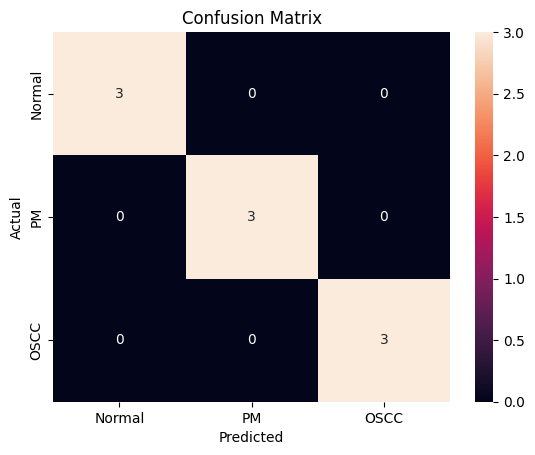

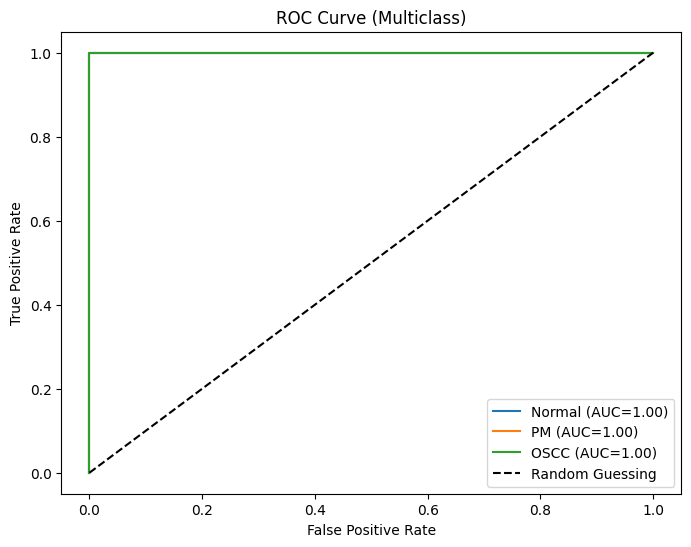

Macro AUC: 1.00
Weighted AUC: 1.00


In [12]:
# Step 1: Define the initial model
logreg = LogisticRegression(multi_class='multinomial', solver='saga',
                            penalty='elasticnet', l1_ratio=0.5, random_state=42, max_iter=1000)

# Step 2: Train the model
logreg.fit(X_train, y_train)

# Step 3: Get feature importances (coefficients)
feature_importances = abs(logreg.coef_).mean(axis=0) 
features_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 4: Select the top 25 features
selected_features_logreg = features_df.head(25)['Feature'].tolist()
print(f"Top 25 Features: {selected_features_logreg}")

# Step 5: Create a reduced dataset with top 25 features
X_train_selected = X_train[selected_features_logreg]
X_test_selected = X_test[selected_features_logreg]

# Step 6: Retrain the model with the reduced dataset
logreg_retrained = LogisticRegression(multi_class='multinomial', solver='saga',
                                      penalty='elasticnet', l1_ratio=0.5, random_state=42, max_iter=1000)
logreg_retrained.fit(X_train_selected, y_train)

# Step 7: Make predictions
y_pred = logreg_retrained.predict(X_test_selected)
y_pred_prob = logreg_retrained.predict_proba(X_test_selected)

# Step 8: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[
            'Normal', 'PM', 'OSCC'], yticklabels=[
            'Normal', 'PM', 'OSCC'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Multiclass AUC
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1]) 
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

class_labels=['Normal', 'PM', 'OSCC']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# Overall AUC
macro_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="macro")
weighted_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="weighted")
print(f"Macro AUC: {macro_auc:.2f}")
print(f"Weighted AUC: {weighted_auc:.2f}")

#### `Random Forest Model`

Top 25 Features: ['MB_1180', 'MB_2823', 'MB_694', 'MB_1900', 'MB_1241', 'MB_180', 'MB_1611', 'MB_2052', 'MB_1207', 'MB_1248', 'MB_1228', 'MB_2333', 'MB_540', 'MB_3734', 'MB_1722', 'MB_2919', 'MB_1340', 'MB_2819', 'MB_3400', 'MB_466', 'MB_2566', 'MB_1393', 'MB_267', 'MB_2645', 'MB_359']
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



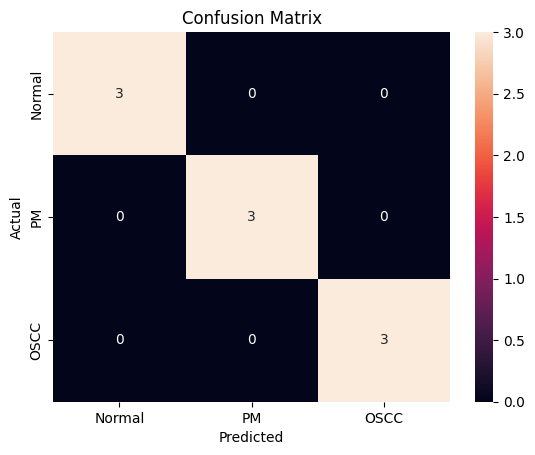

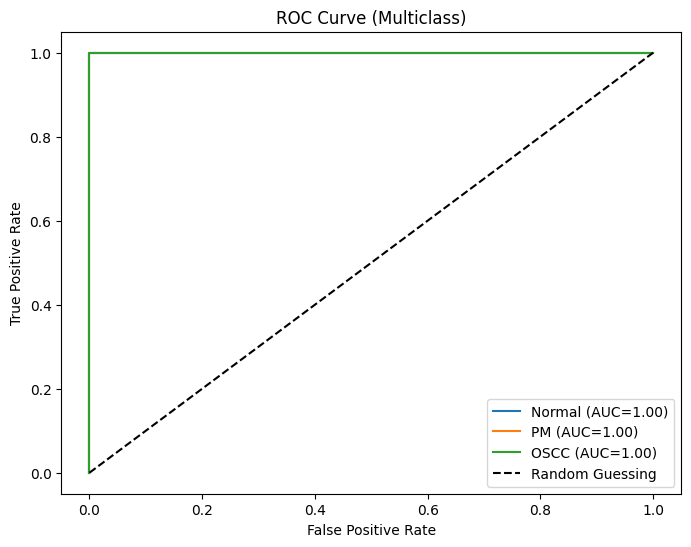

Macro AUC: 1.00
Weighted AUC: 1.00


In [13]:
# Step 1: Train Random Forest to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Get feature importances
importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Select the top 25 features
selected_features_rf_op = features_df.head(25)['Feature'].tolist()
print(f"Top 25 Features: {selected_features_rf_op}")

X_train_selected = X_train[selected_features_rf_op]
X_test_selected = X_test[selected_features_rf_op]

# Step 4: Retrain Random Forest with top 25 features
rf_retrained = RandomForestClassifier(n_estimators=100, random_state=42)
rf_retrained.fit(X_train_selected, y_train)
y_pred = rf_retrained.predict(X_test_selected)
y_pred_prob = rf_retrained.predict_proba(X_test_selected)

# Step 5: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[
            'Normal', 'PM', 'OSCC'], yticklabels=['Normal', 'PM', 'OSCC'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])  # Ensure class labels match
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

class_labels = ['Normal', 'PM', 'OSCC']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# Step 7: Overall AUC Scores
macro_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="macro")
weighted_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="weighted")
print(f"Macro AUC: {macro_auc:.2f}")
print(f"Weighted AUC: {weighted_auc:.2f}")

#### ```SVM model with L1 regularization```<br>
##### We will find the top features as per L1 regularization.

Selected Features: ['MB_43', 'MB_271', 'MB_466', 'MB_540', 'MB_564', 'MB_631', 'MB_921', 'MB_1019', 'MB_1081', 'MB_1175', 'MB_1228', 'MB_1241', 'MB_1248', 'MB_1336', 'MB_1773', 'MB_1900', 'MB_2053', 'MB_2210', 'MB_2232', 'MB_2259', 'MB_2511', 'MB_2823', 'MB_2860', 'MB_3219', 'MB_3400']
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         3
           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



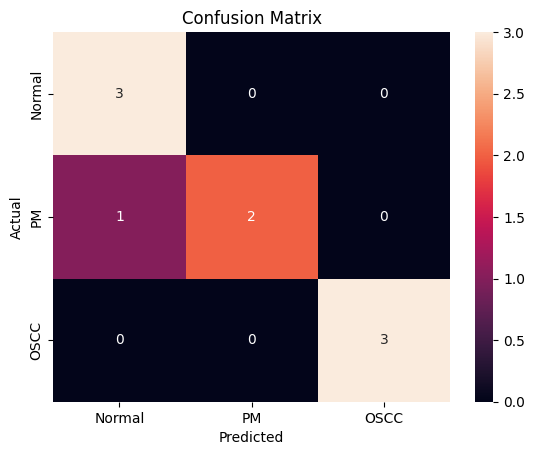

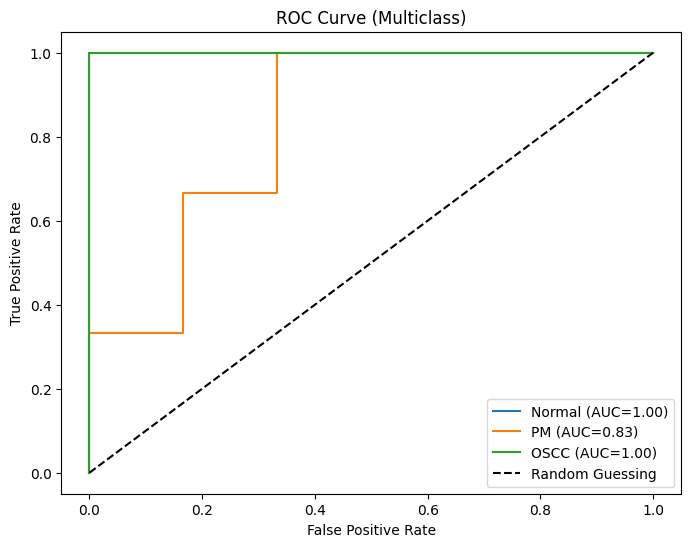

Macro AUC: 0.94
Weighted AUC: 0.94


In [14]:
# Step 1: Train LinearSVC to get feature importances
svc = LinearSVC(penalty='l1', dual=False, C=1.0, random_state=42, max_iter=1000)
svc.fit(X_train, y_train)

# Step 2: Get feature importances (non-zero coefficients)
sfm = SelectFromModel(svc, max_features=25, prefit=True)
selected_features = sfm.get_support(indices=True)
selected_features_svm_l1 = X_train.columns[selected_features]
print(f"Selected Features: {list(selected_features_svm_l1)}")

# Step 3: Create datasets with selected features
X_train_selected = X_train[selected_features_svm_l1]
X_test_selected = X_test[selected_features_svm_l1]

# Step 4: Retrain the model on selected features
svc_retrained = LinearSVC(penalty='l1', dual=False, C=1.0, random_state=42, max_iter=1000)
svc_retrained.fit(X_train_selected, y_train)

# Step 5: Evaluate Model Performance
y_pred = svc_retrained.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[
            'Normal', 'PM', 'OSCC'], yticklabels=['Normal', 'PM', 'OSCC'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])
y_pred_decision = svc_retrained.decision_function(X_test_selected)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_decision[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_decision[:, i])

class_labels = ['Normal', 'PM', 'OSCC']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# Step 8: Overall AUC Scores
macro_auc = roc_auc_score(y_test_binarized, y_pred_decision, average="macro")
weighted_auc = roc_auc_score(y_test_binarized, y_pred_decision, average="weighted")
print(f"Macro AUC: {macro_auc:.2f}")
print(f"Weighted AUC: {weighted_auc:.2f}")

#### ```SVM model with Recursive Feature Elimination``` <br>
##### Using this we will find the top 25 features.

Selected Features: ['MB_43', 'MB_369', 'MB_466', 'MB_732', 'MB_1019', 'MB_1062', 'MB_1081', 'MB_1175', 'MB_1228', 'MB_1241', 'MB_1248', 'MB_1393', 'MB_1680', 'MB_1724', 'MB_1773', 'MB_1900', 'MB_1965', 'MB_2052', 'MB_2128', 'MB_2210', 'MB_2232', 'MB_2823', 'MB_3043', 'MB_3084', 'MB_3400']
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.75         9
weighted avg       0.87      0.78      0.75         9



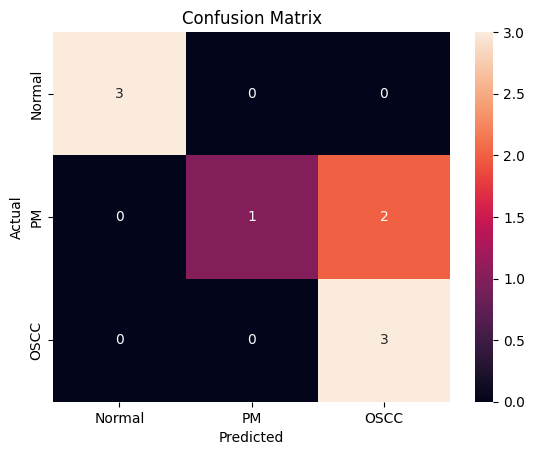

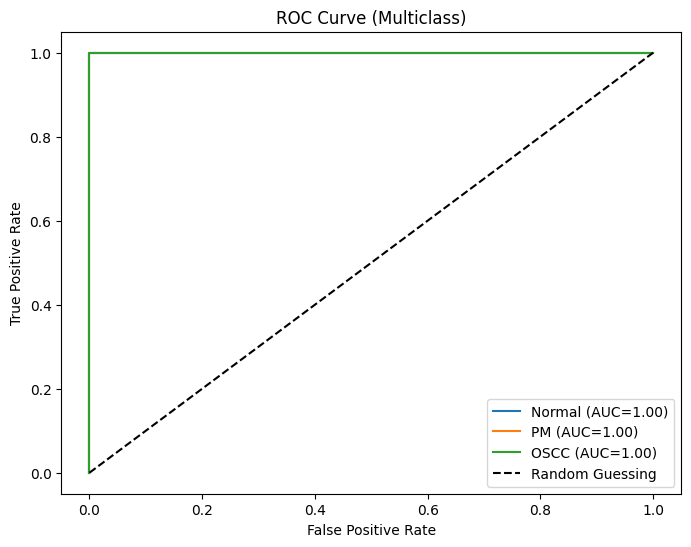

Macro AUC: 1.00
Weighted AUC: 1.00


In [15]:
# Step 1: Train SVM with RBF kernel and perform RFE
svc = SVC(kernel='linear', probability=True, random_state=42)  # Use linear kernel for interpretability
rfe = RFE(estimator=svc, n_features_to_select=25, step=1)  # Select top 25 features
rfe.fit(X_train, y_train)

# Step 2: Get selected features
selected_features_svm_rfe = X_train.columns[rfe.support_]
print(f"Selected Features: {list(selected_features_svm_rfe)}")

# Step 3: Create reduced datasets
X_train_selected = X_train[selected_features_svm_rfe]
X_test_selected = X_test[selected_features_svm_rfe]

# Step 4: Retrain the SVM model on selected features
svc_retrained = SVC(kernel='linear', probability=True, random_state=42)
svc_retrained.fit(X_train_selected, y_train)

# Step 5: Make predictions
y_pred = svc_retrained.predict(X_test_selected)
y_pred_prob = svc_retrained.predict_proba(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[
            'Normal', 'PM', 'OSCC'], yticklabels=['Normal', 'PM', 'OSCC'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

class_labels = ['Normal', 'PM', 'OSCC']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# Step 9: Overall AUC Scores
macro_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="macro")
weighted_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="weighted")
print(f"Macro AUC: {macro_auc:.2f}")
print(f"Weighted AUC: {weighted_auc:.2f}")

#### `Results`

In [16]:
# Convert Series to lists
selected_features_svm_l1 = selected_features_svm_l1.tolist()
selected_features_svm_rfe = selected_features_svm_rfe.tolist()

# Find the maximum length of the arrays
max_length = max(len(selected_features_logreg), len(selected_features_rf_op), len(selected_features_svm_l1), len(selected_features_svm_rfe))

# Pad the arrays with None to make them the same length
selected_features_logreg += [None] * (max_length - len(selected_features_logreg))
selected_features_rf_op += [None] * (max_length - len(selected_features_rf_op))
selected_features_svm_l1 += [None] * (max_length - len(selected_features_svm_l1))
selected_features_svm_rfe += [None] * (max_length - len(selected_features_svm_rfe))

# Create the DataFrame
selected_features = pd.DataFrame({
    'Logistic Regression': selected_features_logreg,
    'Random Forest': selected_features_rf_op,
    'SVM L1': selected_features_svm_l1,
    'SVM RFE': selected_features_svm_rfe
})

# Save to Excel
selected_features.to_excel('../results/selected_features_3groups_positive.xlsx', index=False)